<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Первые 5 строк датасета:
   record_id  estate  debts     wills  husband  wives  father  mother  sons  \
0          1  170040  22540   2663.76     True      0    True    True     2   
1          2  181741  10376  14674.26    False      0    True    True     1   
2          3  158290   2848   2591.00     True      0   False   False     1   
3          4  167814  34762   4936.79    False      1    True    True     0   
4          5  101742  21068  12245.39    False      1    True    True     0   

   daughters  ...  grandmother  share_husband  share_wife  share_father  \
0          2  ...         True       36209.06        0.00      24139.37   
1          1  ...         True           0.00        0.00      26115.12   
2          0  ...        False       38212.75        0.00          0.00   
3          1  ...         True           0.00    16014.40      21352.53   
4          3  ...        False           0.00     7603.18      10137.57   

   share_mother  share_sons  share_daughters  net

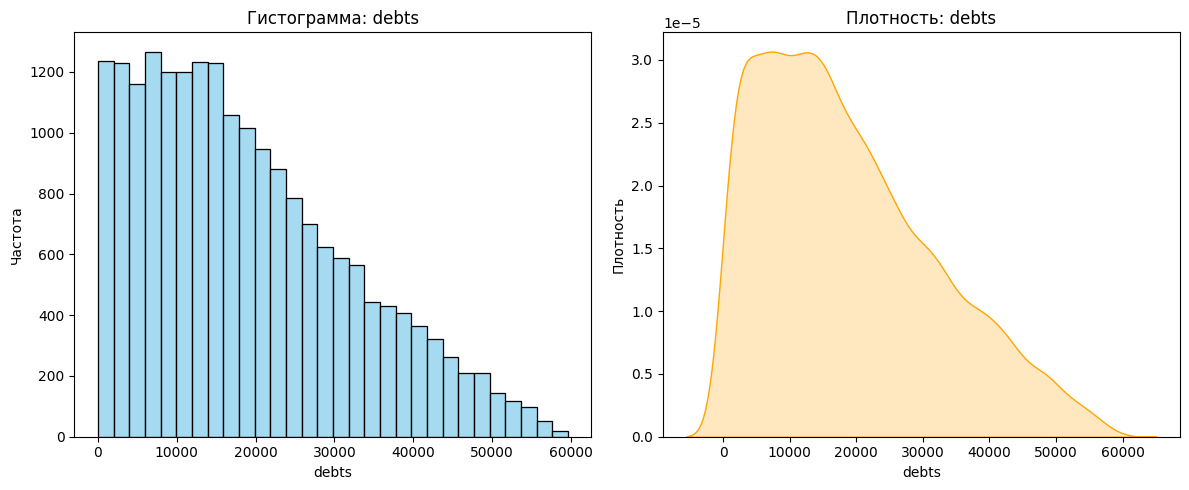

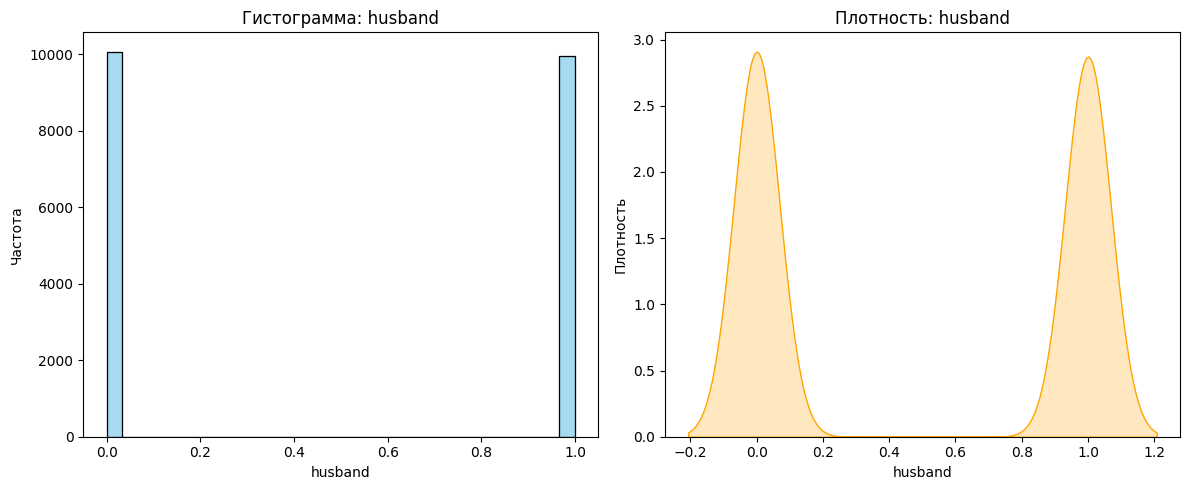

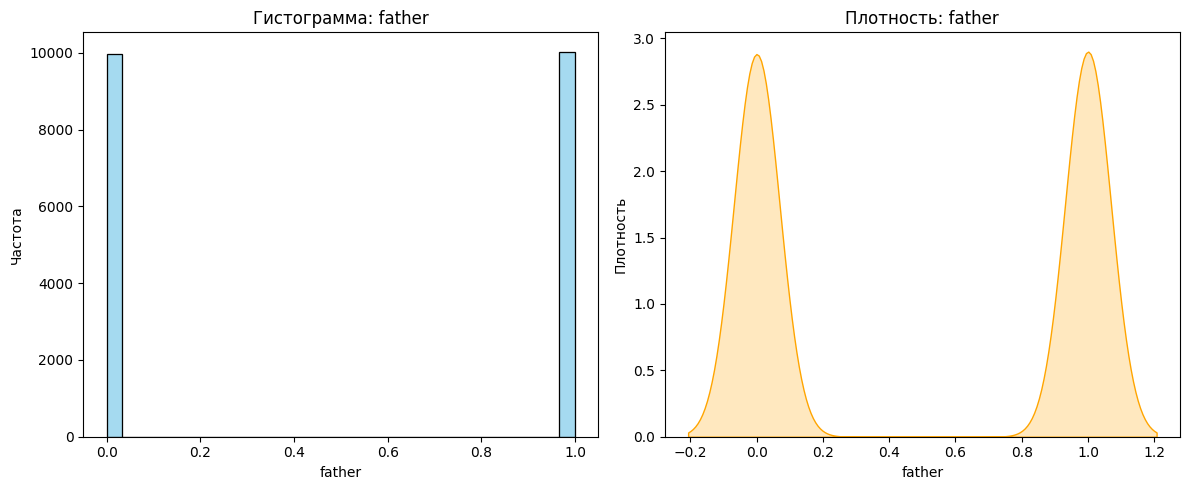

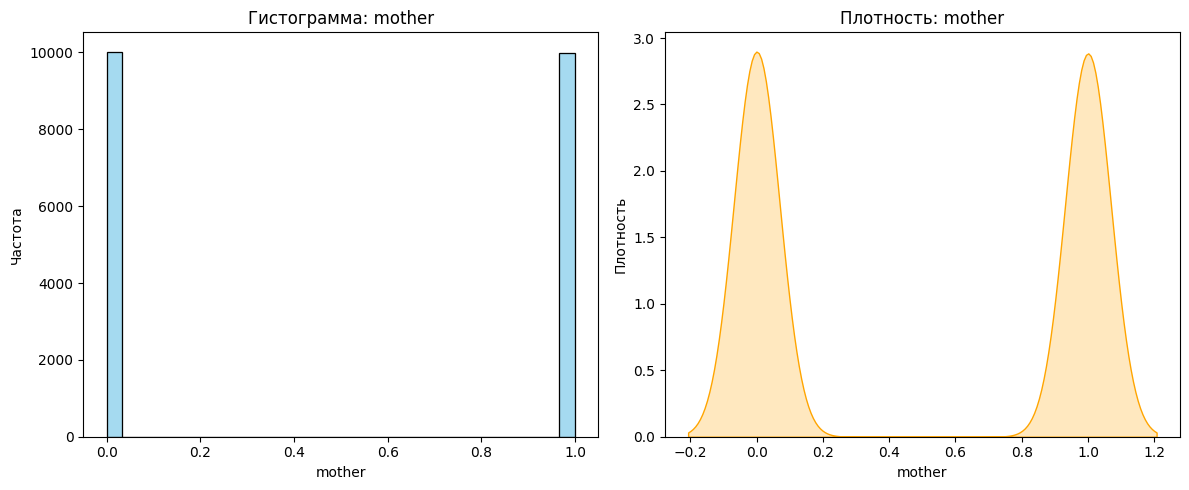

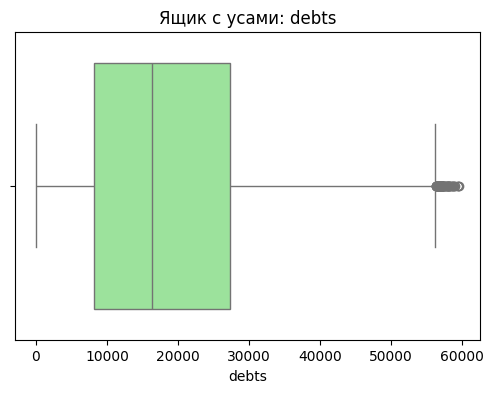

Признак 'debts': 53 выбросов из 20000 наблюдений


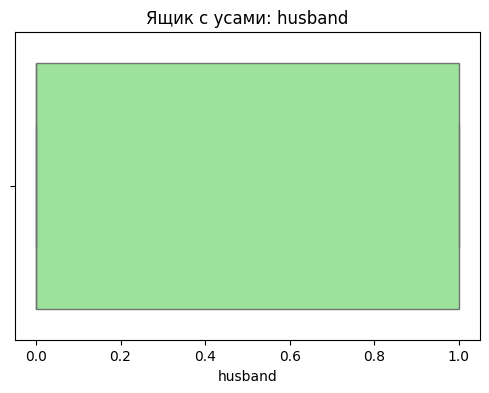

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [1]:
# -------------------------------------------------------------- Лабораторная работа №2: Анализ распределений и корреляций

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- Load Data ---

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/cleaned_inheritance_dataset.csv"

df = pd.read_csv(url)

print("Первые 5 строк датасета:")
print(df.head())
# --- Feature Lists (adjust if necessary) ---
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]
categorical_features = ['text']

# --- Check for available features ---
existing_numerical = [col for col in numerical_features if col in df.columns]
existing_categorical = [col for col in categorical_features if col in df.columns]

print(f"Используемые числовые признаки: {existing_numerical}")
print(f"Используемые категориальные признаки: {existing_categorical}")

# --- Clean Data ---
df_num = df[existing_numerical].dropna()
print(f"\nРазмер числового датафрейма после удаления пропусков: {df_num.shape}")

# --- Visualize Distributions ---
for feature in existing_numerical:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False, color='skyblue')
    plt.title(f'Гистограмма: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True, color='orange')
    plt.title(f'Плотность: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# --- Boxplots (Outlier Detection) ---
for feature in existing_numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature], color='lightgreen')
    plt.title(f'Ящик с усами: {feature}')
    plt.xlabel(feature)
    plt.show()

    # Outlier summary
    q1 = df_num[feature].quantile(0.25)
    q3 = df_num[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = df_num[(df_num[feature] < q1 - 1.5 * iqr) | (df_num[feature] > q3 + 1.5 * iqr)]
    print(f"Признак '{feature}': {len(outliers)} выбросов из {len(df_num)} наблюдений")

# --- Text Feature Analysis ---
if 'text' in df.columns:
    print("\nПримеры текстовых описаний:")
    print(df['text'].head(5))

    df['text_length'] = df['text'].astype(str).apply(len)
    plt.figure(figsize=(8,5))
    sns.histplot(df['text_length'], bins=30, color='purple')
    plt.title('Распределение длины текстовых описаний')
    plt.xlabel('Длина текста')
    plt.ylabel('Частота')
    plt.show()

    print("\nСтатистика по длине текста:")
    print(df['text_length'].describe())

# --- Correlation Matrix ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Summary Statistics ---
print("\nКраткие статистики по числовым признакам:\n", df_num.describe())

# --- Pairplot for deeper analysis (optional, can be slow for large datasets) ---
if len(existing_numerical) <= 6:  # Limit to avoid heavy plots
    sns.pairplot(df_num)
    plt.suptitle("Парные графики для числовых признаков", y=1.02)
    plt.show()

# --- Example Insights ---
print("\nПример анализа:")
print("- Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.")
print("- Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.")
print("- Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.")
